In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
import pandas as pd
import numpy as np
import plotly
np.random.seed(0)
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv') # ,sep=';')
# Suppose the target is a binary variable
for i in range(len(df['quality'])):
    if df['quality'][i]<=4:
        df['quality'][i]='Low'
    elif df['quality'][i]<=6:
        df['quality'][i]='Medium'
    else:
        df['quality'][i]='High'
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/py

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium


In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['quality']= label_encoder.fit_transform(df['quality'])
classes=label_encoder.classes_
labels=[0,1,2]
d=dict(zip(labels,classes))
print(d)

{0: 'High', 1: 'Low', 2: 'Medium'}


In [26]:
df['quality'].value_counts()

2    1319
0     217
1      63
Name: quality, dtype: int64

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
Y=df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.values,random_state=10, test_size = 0.2)
model = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)
print(model1.feature_importances_)

[0.05790618 0.13031236 0.08855695 0.07754598 0.04853377 0.06071269
 0.08555295 0.07531868 0.05186134 0.13520796 0.18849115]


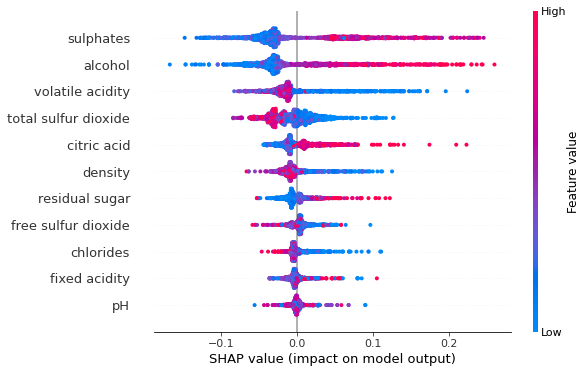

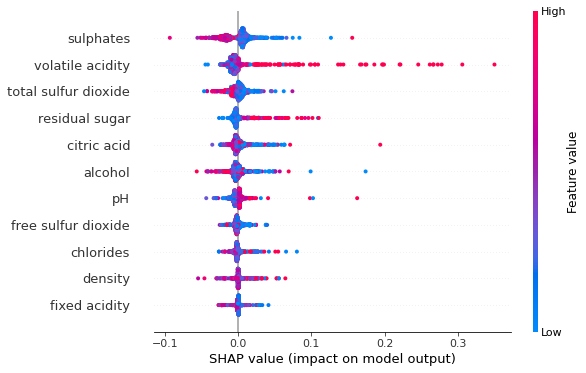

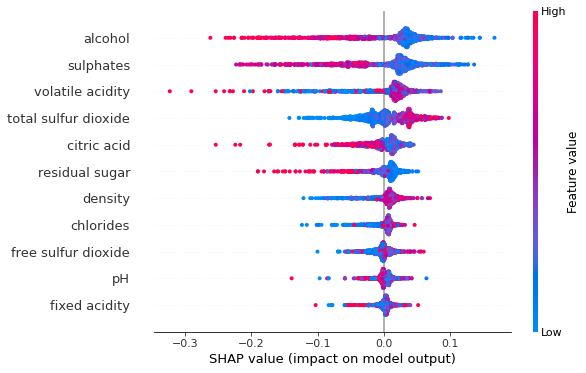

In [39]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
for which_class in range(0,3):
    shap.summary_plot(shap_values[which_class], X_train)
#{0: 'High', 1: 'Low', 2: 'Medium'}

In [37]:
idx=0
test_row_predict=model.predict(X.iloc[[idx]])
test_row_predict_proba=model.predict_proba(X.iloc[[idx]])
print(test_row_predict)
print(test_row_predict_proba)

[2]
[[0.03848089 0.03514052 0.92637859]]


In [38]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X.iloc[[idx]])
shap.initjs()
for which_class in range(0,3):
    display(shap.force_plot(explainer.expected_value[which_class], shap_values[which_class], X.iloc[[idx]]))

# Additive_nature of shap
# Base_value+sum(shap_values)==predicted_probability

In [57]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test.iloc[[0]])
shap_values

[array([[ 0.00098442, -0.0209772 ,  0.00769524, -0.00630261, -0.00679813,
          0.00439976,  0.00991976, -0.00873222, -0.00118657, -0.02440312,
         -0.03135492]]),
 array([[ 0.00087323, -0.00909916, -0.00469635, -0.00444305, -0.00079303,
         -0.00234826,  0.0037851 ,  0.00148996,  0.00078965,  0.00384897,
         -0.00752115]]),
 array([[-0.00185765,  0.03007636, -0.00299889,  0.01074566,  0.00759117,
         -0.00205149, -0.01370487,  0.00724226,  0.00039692,  0.02055415,
          0.03887607]])]

In [58]:
rand_proba=model.predict_proba(X_test.iloc[[0]])
rand_proba

array([[0.05600438, 0.02199536, 0.92200025]])

In [59]:
import math
shap_sum = explainer.expected_value + [i.sum() for i in shap_values]
shap_sum
#assert(math.isclose(shap_sum,rand_proba[0][1],rel_tol=1e-06)) #if this was False, and error would be thrown

array([0.05600438, 0.02199536, 0.92200025])